In [1]:
from mle_toolbox.utils import (plot_heatmap_array, hyper_log_to_df,
                               visualize_1D_bar, visualize_1D_line)
import numpy as np

# Speed Comparisons for Different Devices

In [2]:
cpu_speeds = np.load("../benchmarks/cpu_speed.npy")
gpu_tesla_speeds = np.load("../benchmarks/gpu_tesla_k40_speed.npy")
gpu_2080ti_speeds = np.load("../benchmarks/gpu_rtx2080ti_speed.npy")

# rows: network sizes, cols: population sizes
population_sizes = [100, 250, 500, 750, 1000]
network_sizes = [16, 48, 80, 112, 144]
cpu_speeds.shape

(3, 5, 5)

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcbcb974c50>)

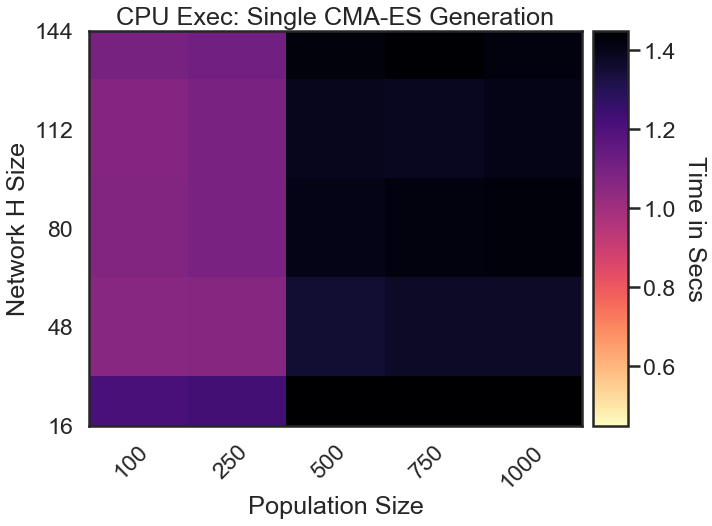

In [11]:
plot_heatmap_array(range_x=population_sizes,
                   range_y=network_sizes,
                   heat_array=cpu_speeds[1],
                   title="CPU Exec: Single CMA-ES Generation",
                   xy_labels=["Population Size", "Network H Size"],
                   variable_name="Time in Secs",
                   every_nth_tick=1,
                   text_in_cell = False,
                   min_heat = 0.45,
                   max_heat = 1.45,
                   round_ticks=0,
                   cmap="magma_r")

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcbcbf3f390>)

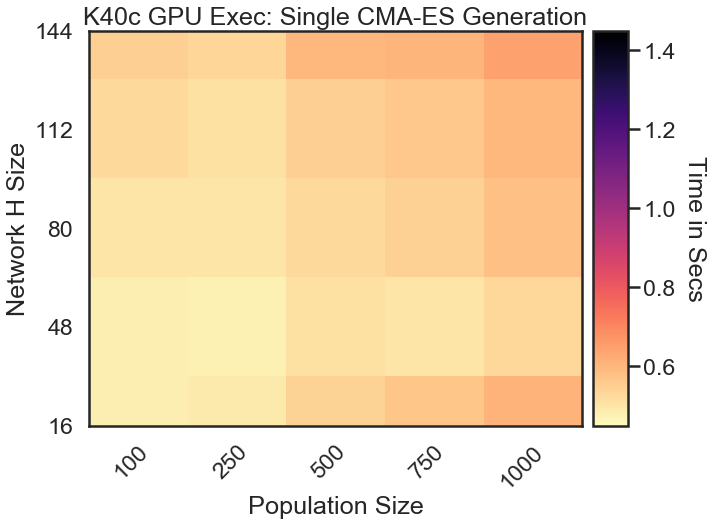

In [10]:
plot_heatmap_array(range_x=population_sizes,
                   range_y=network_sizes,
                   heat_array=gpu_tesla_speeds[1],
                   title="K40c GPU Exec: Single CMA-ES Generation",
                   xy_labels=["Population Size", "Network H Size"],
                   variable_name="Time in Secs",
                   every_nth_tick=1,
                   text_in_cell = False,
                   min_heat = 0.45,
                   max_heat = 1.45,
                   round_ticks=0,
                   cmap="magma_r")

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcbc9460710>)

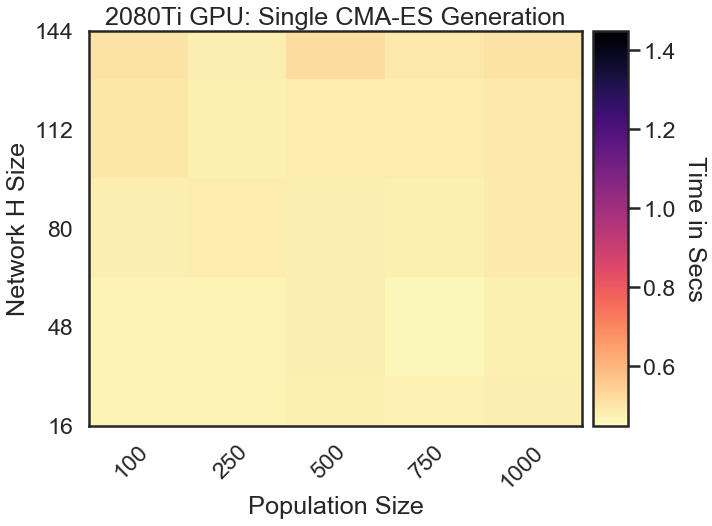

In [9]:
plot_heatmap_array(range_x=population_sizes,
                   range_y=network_sizes,
                   heat_array=gpu_2080ti_speeds[1],
                   title="2080Ti GPU: Single CMA-ES Generation",
                   xy_labels=["Population Size", "Network H Size"],
                   variable_name="Time in Secs",
                   every_nth_tick=1,
                   text_in_cell = False,
                   min_heat = 0.45,
                   max_heat = 1.45,
                   round_ticks=0,
                   cmap="magma_r")

# Hyperparameter Comparison for Pendulum CMA-ES

In [ ]:
df_pop_hiddens = hyper_log_to_df("../experiments/gridsearch/01/hyperlog.pkl")
fixed_params = None
param_to_plot = 'hidden_size'
target_to_plot = 'target'
visualize_1D_bar(df_pop_hiddens, param_to_plot, target_to_plot,
                 "CMA-ES: Hidden Dimension - [3, H, 1]",
                 ["H - Hidden Layer Size", "Cum. Episode Cost"], 1)

In [ ]:
df_c_m = hyper_log_to_df("../experiments/gridsearch/02/hyperlog.pkl")
fixed_params = None
param_to_plot = 'c_m'
target_to_plot = 'target'
visualize_1D_bar(df_c_m, param_to_plot, target_to_plot,
                 r"CMA-ES: Mean Learning Rates $c_m$",
                 [r"Mean Learning Rate $c_m$", "Cum. Episode Cost"], 1, (0, 500))

In [ ]:
df_elite = hyper_log_to_df("../experiments/gridsearch/03/hyperlog.pkl")
fixed_params = None
param_to_plot = 'elite_percentage'
target_to_plot = 'target'
visualize_1D_bar(df_elite, param_to_plot, target_to_plot,
                 r"CMA-ES: Sizes of Truncation Selection",
                 [r"% Percentage of Total Population", "Cum. Episode Cost"], 1)